# Testing the geodesic calculator

In [1]:
from exponential_factory import ExponentialFactory
import os
import torch
import numpy as np
from generic_geodesic import GenericGeodesic
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
tensor_type = torch.DoubleTensor
from matplotlib.pyplot import cm
from utils import create_regular_grid_of_points, get_metric_ellipses_info
from metric_from_geodesics import sample_geodesics, compute_trajectories, plot_trajectories, sample_geodesics_uniform

tensor_type = torch.DoubleTensor

# One-dimensional example

tensor([[0.9016],
        [0.5266]], dtype=torch.float64)
1.0 10.890492196218657
1.000256245824364 8.508265716460112
1.0000295420058822 25.390961020762173
1.0306894539954226 19.361926988838587
1.0000000000000002 1.3900275766364305


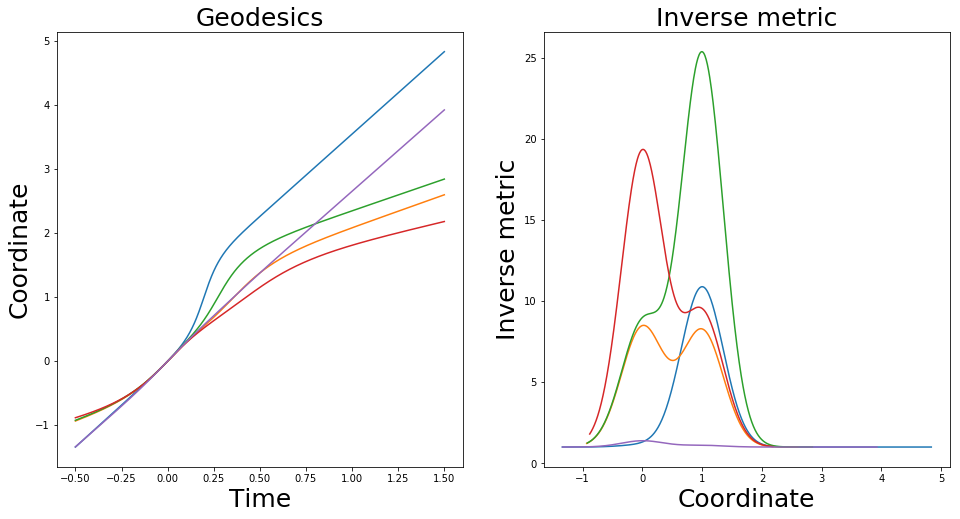

In [11]:
manifold_type = 'parametric'
dimension = 1
spd_dimension = int(dimension * (dimension + 1) / 2)
number_of_interpolation_points = 2
width = 1./number_of_interpolation_points

interpolation_points_np = np.linspace(0., 1., number_of_interpolation_points).reshape(number_of_interpolation_points, dimension)

interpolation_points = torch.from_numpy(interpolation_points_np).type(tensor_type)
interpolation_values = torch.from_numpy(np.random.uniform(size=(number_of_interpolation_points, spd_dimension))).type(tensor_type)
print(interpolation_values)

manifold_parameters = {'width':width, 
                      'interpolation_points':interpolation_points,
                      'interpolation_values':interpolation_values}

factory = ExponentialFactory(manifold_type=manifold_type, manifold_parameters=manifold_parameters, dimension=dimension)
geodesic = GenericGeodesic(factory)
geodesic.set_t0(0.)
geodesic.set_tmin(-0.5)
geodesic.set_tmax(1.5)
geodesic.concentration_of_time_points = 500

p0 = np.zeros(1)

p0 = torch.from_numpy(p0).type(tensor_type)
v0 = torch.from_numpy(np.ones(1)).type(tensor_type)*3.
geodesic.set_position_t0(p0)
geodesic.set_velocity_t0(v0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

for i in range(5):
    interpolation_values = torch.from_numpy(np.random.uniform(size=(number_of_interpolation_points, spd_dimension))).type(tensor_type)
    interpolation_values = 5. * interpolation_values
    geodesic.set_parameters(interpolation_values)
    geodesic.set_position_t0(p0)
    geodesic.set_velocity_t0(v0)
    geodesic.update()
    traj = np.array([elt.data.numpy() for elt in geodesic.get_geodesic_trajectory()])
    times = geodesic.get_times()
    # We also get the values of the inverse metric at the points where the geodesic is
    inverse_metric_values = [geodesic.forward_exponential.inverse_metric(elt) for elt in geodesic.get_geodesic_trajectory()]
    inverse_metric_values = np.array(inverse_metric_values)
    print(np.min(inverse_metric_values), np.max(inverse_metric_values))
    for d in range(len(traj[0])):
        #plt.scatter(times, traj[:,d], c=inverse_metric_values)
        ax1.plot(times, traj[:,d])
    ax2.plot(traj, inverse_metric_values)
ax1.set_xlabel('Time', fontsize=25)
ax1.set_ylabel('Coordinate', fontsize=25)
ax1.set_title('Geodesics', fontsize=25)
ax2.set_xlabel('Coordinate', fontsize=25)
ax2.set_ylabel('Inverse metric', fontsize=25)
ax2.set_title('Inverse metric', fontsize=25)

plt.savefig('../Figures/sample_parametric_geodesics.pdf', bbox_inches='tight', pad_inches=0)
plt.show()



    #plt.plot(interpolation_points_np, interpolation_values.detach().numpy())
    #plt.show()

In [ ]:
def plot_metric(exponential):
    ells = []
    positions, heights, widths, angles = get_metric_ellipses_info(exponential)
    from matplotlib.patches import Ellipse
    for (position, width, height, angle) in zip(positions, heights, widths, angles):
        ellipse = Ellipse(xy = (position[0], position[1]), width=width, height=height, angle=angle)
        ells.append(ellipse)
    fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'}, figsize=(30, 30))
    plt.axis('off')
    colors = cm.rainbow(np.linspace(0, 1, len(ells)*10))
    for (e, color) in zip(ells, colors):
        ax.add_artist(e)
        e.set_clip_box(ax.bbox)
        e.set_alpha(0.5)
        e.set_facecolor(color)
    plt.xlim(-0.4, 1.4)
    plt.ylim(-0.4, 1.4)
    return ax
    
def plot_trajectories(trajectories, linestyle='-', max_plots=100, ax=None):
    color = ['black' for elt in trajectories]#cm.rainbow(np.linspace(0, 1, 200))
    for i, traj in enumerate(trajectories):
        if ax is None:
            plt.plot(traj.detach().numpy()[:, 0], traj.detach().numpy()[:, 1], linewidth=3., linestyle=linestyle, c=color[i])
        else:
            ax.scatter(traj.detach().numpy()[:, 0], traj.detach().numpy()[:, 1], linestyle=linestyle, c=color[i], alpha=0.7)
        if i >= max_plots - 1:
            break

    

50 trajectories have been computed
50 geodesics have been sampled.


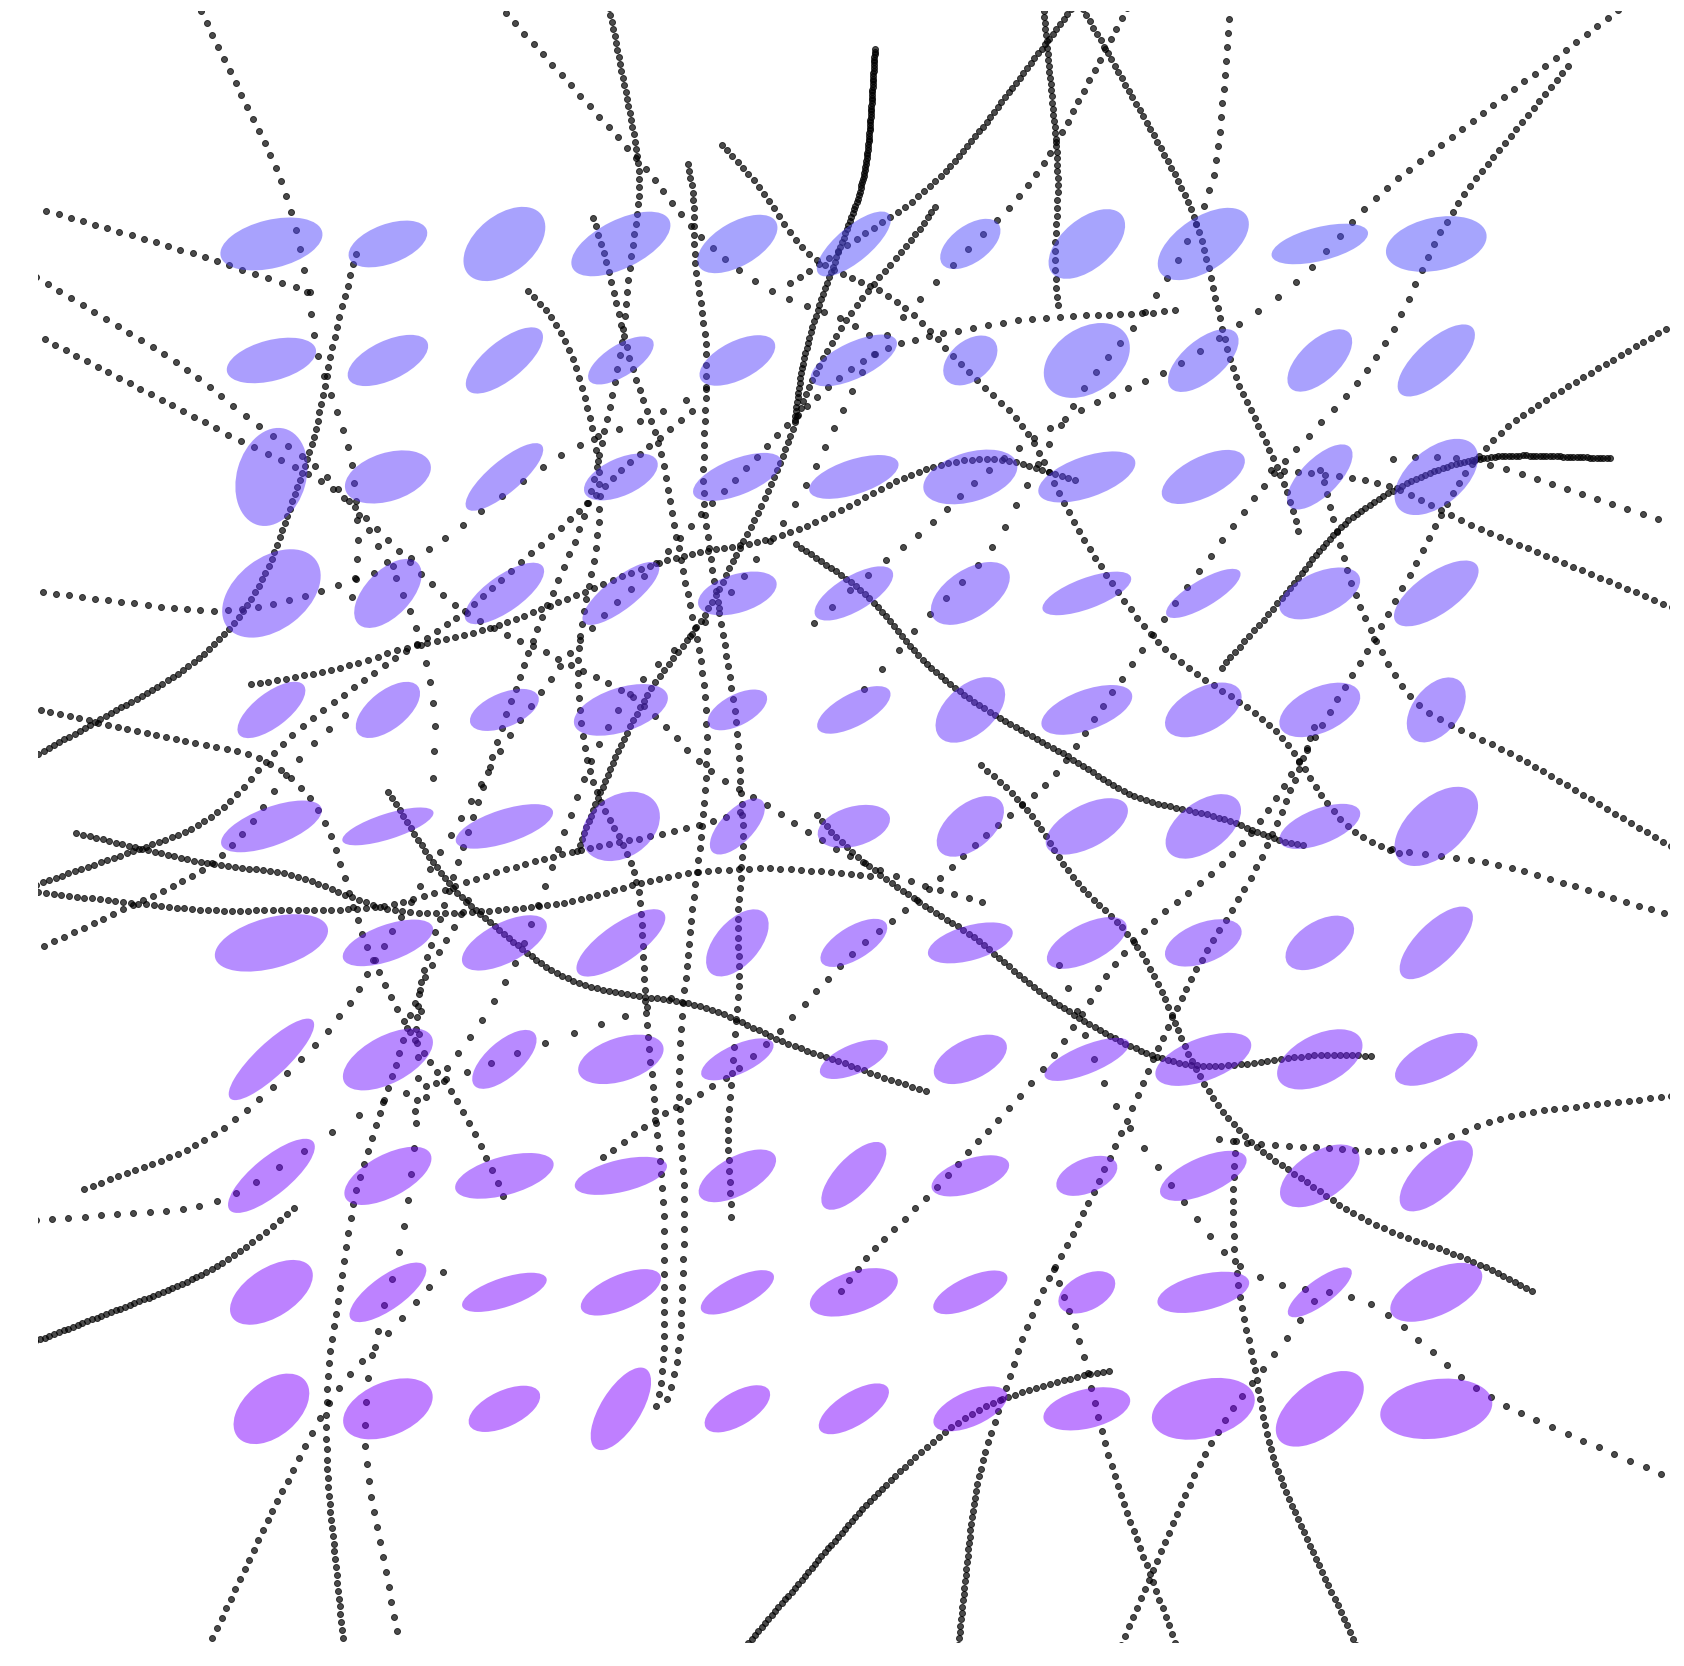

50 trajectories have been computed
50 geodesics have been sampled.


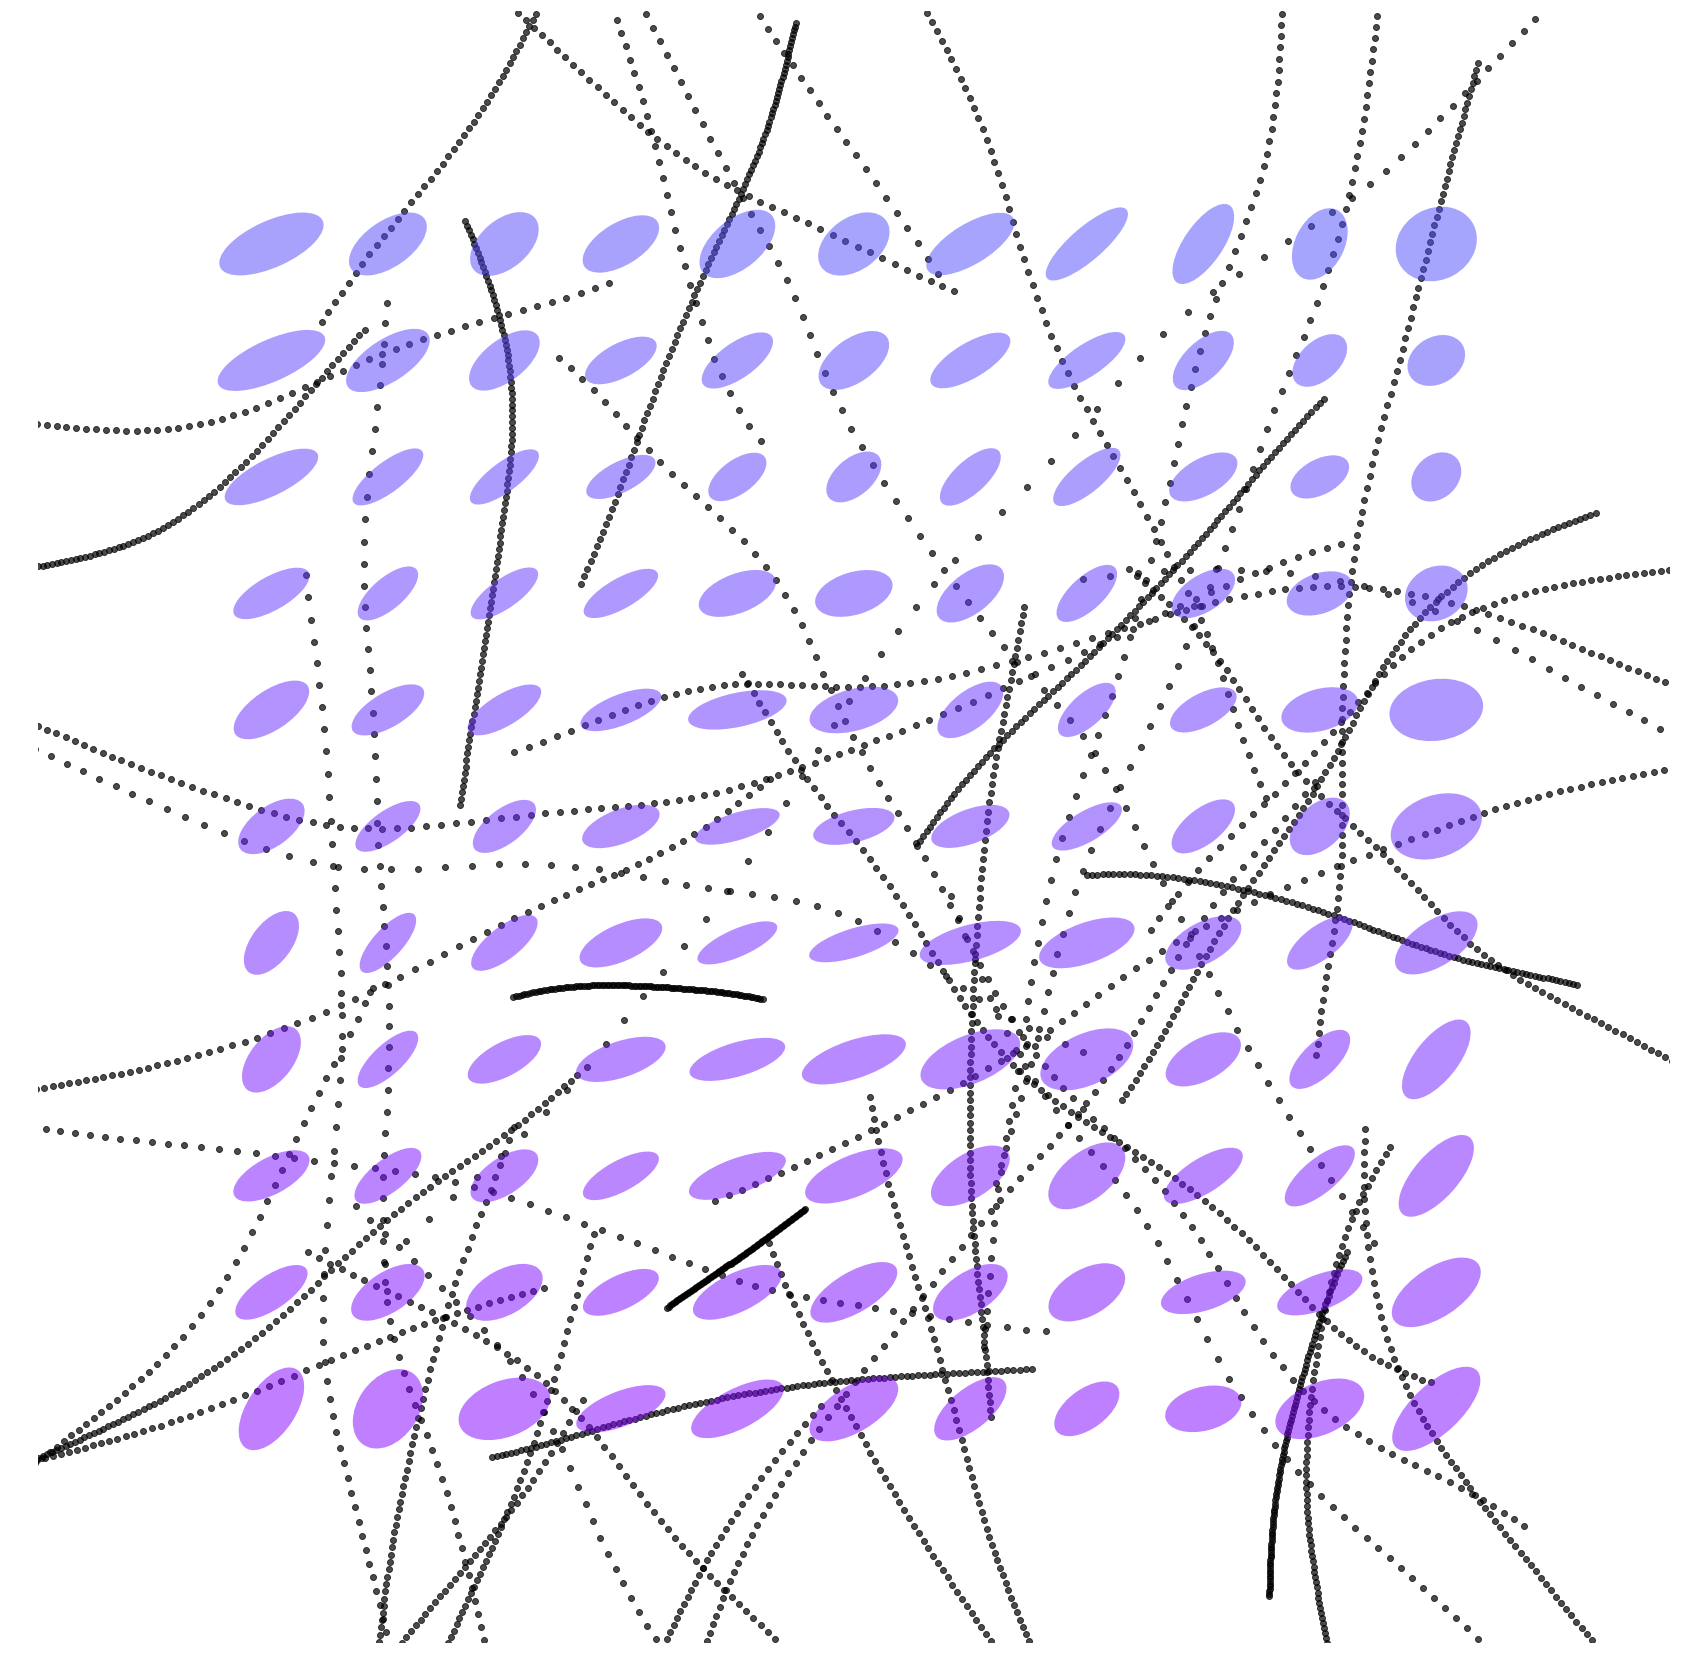

50 trajectories have been computed
50 geodesics have been sampled.


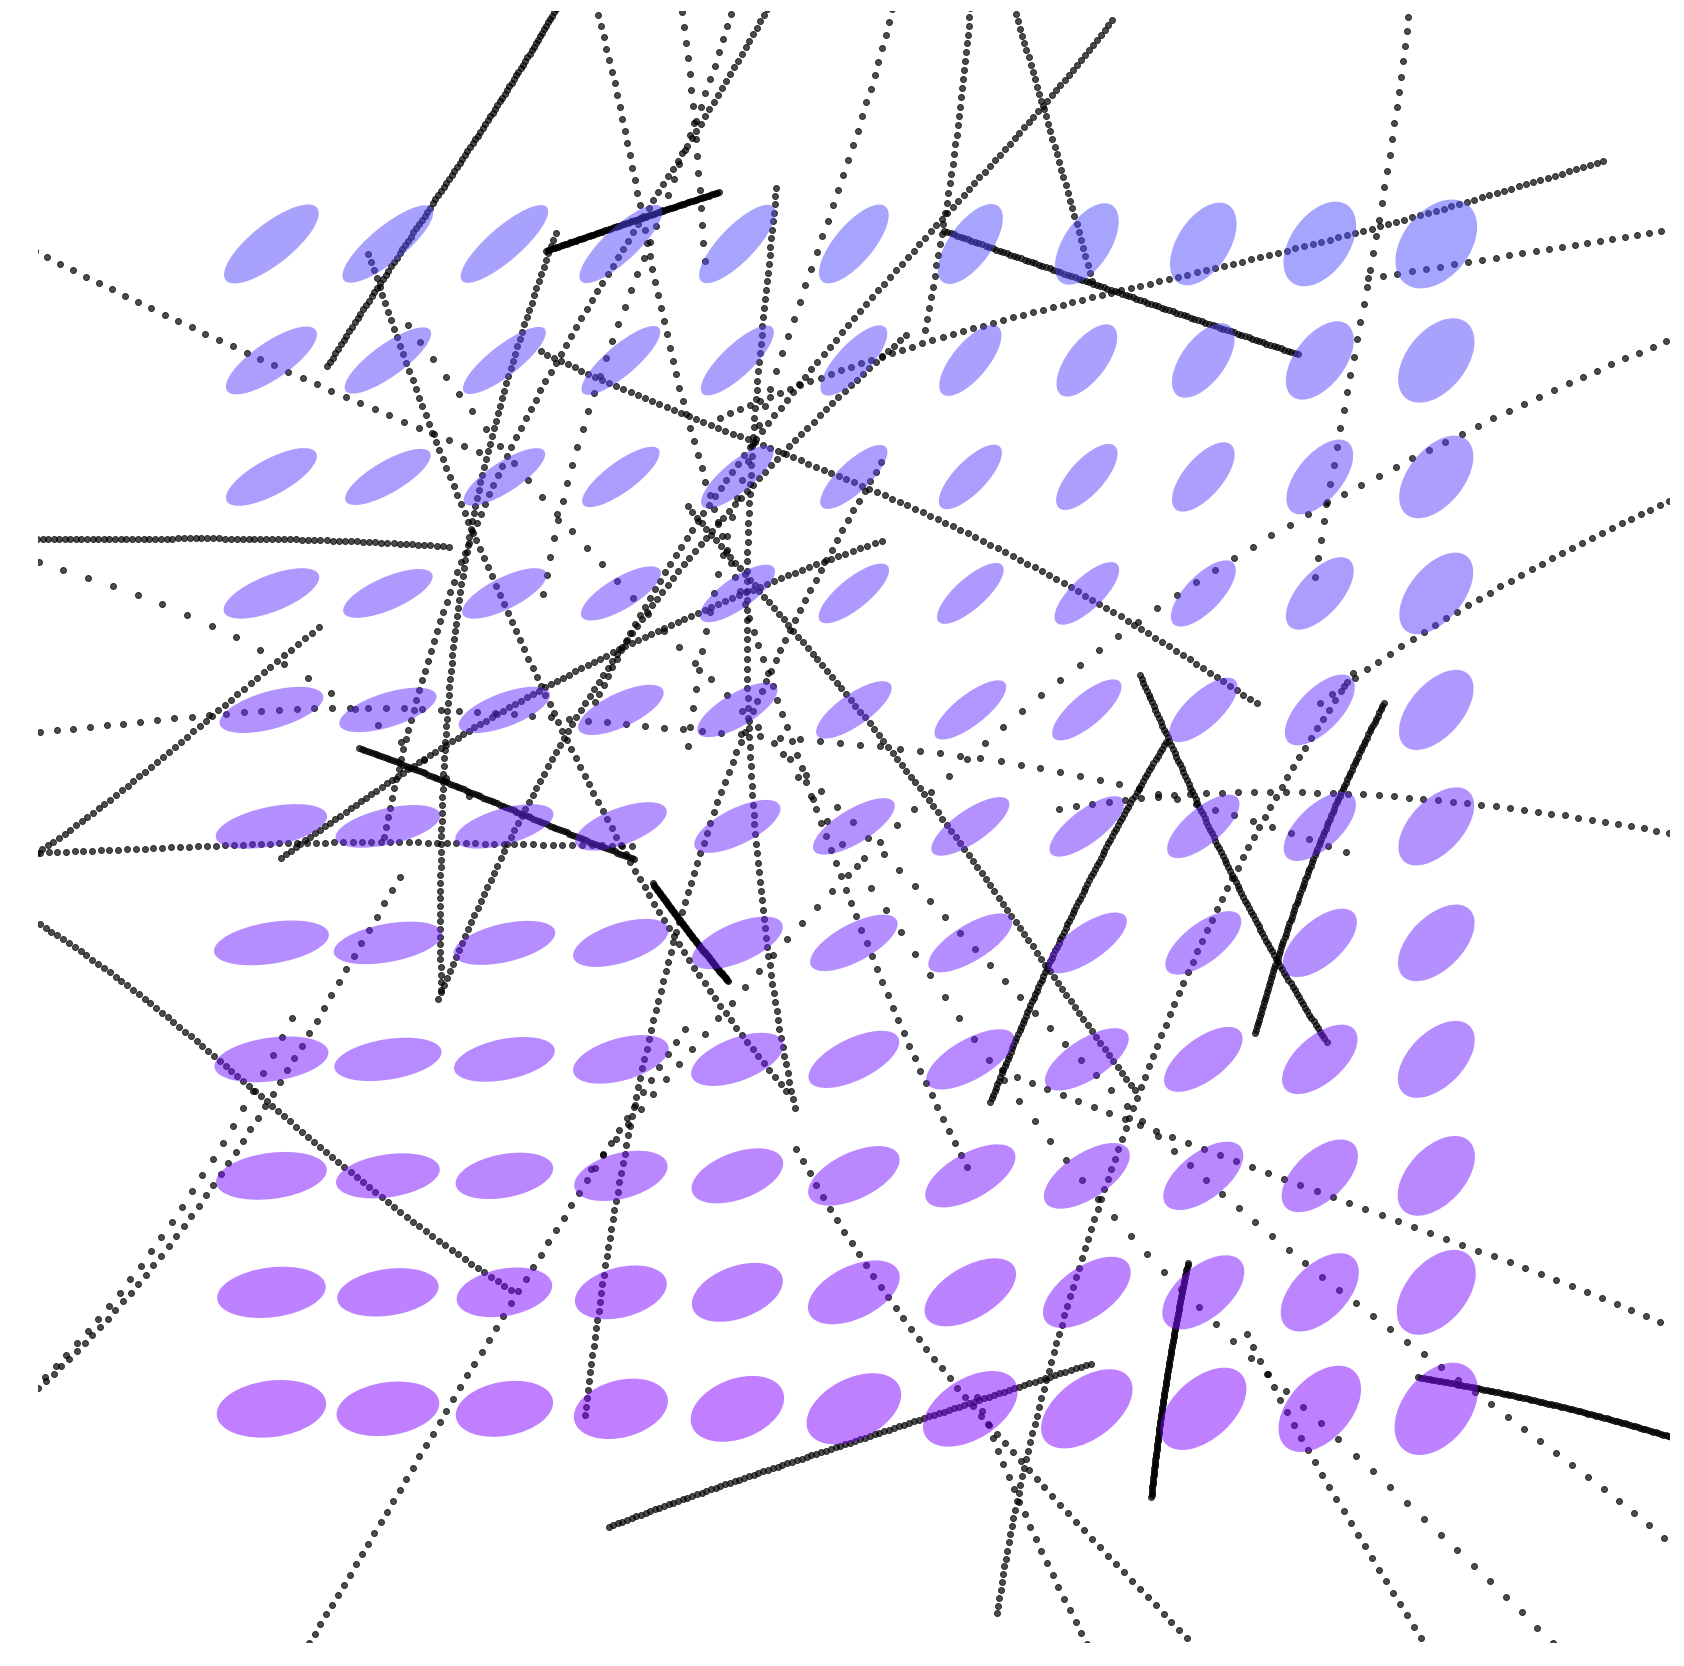

50 trajectories have been computed
50 geodesics have been sampled.


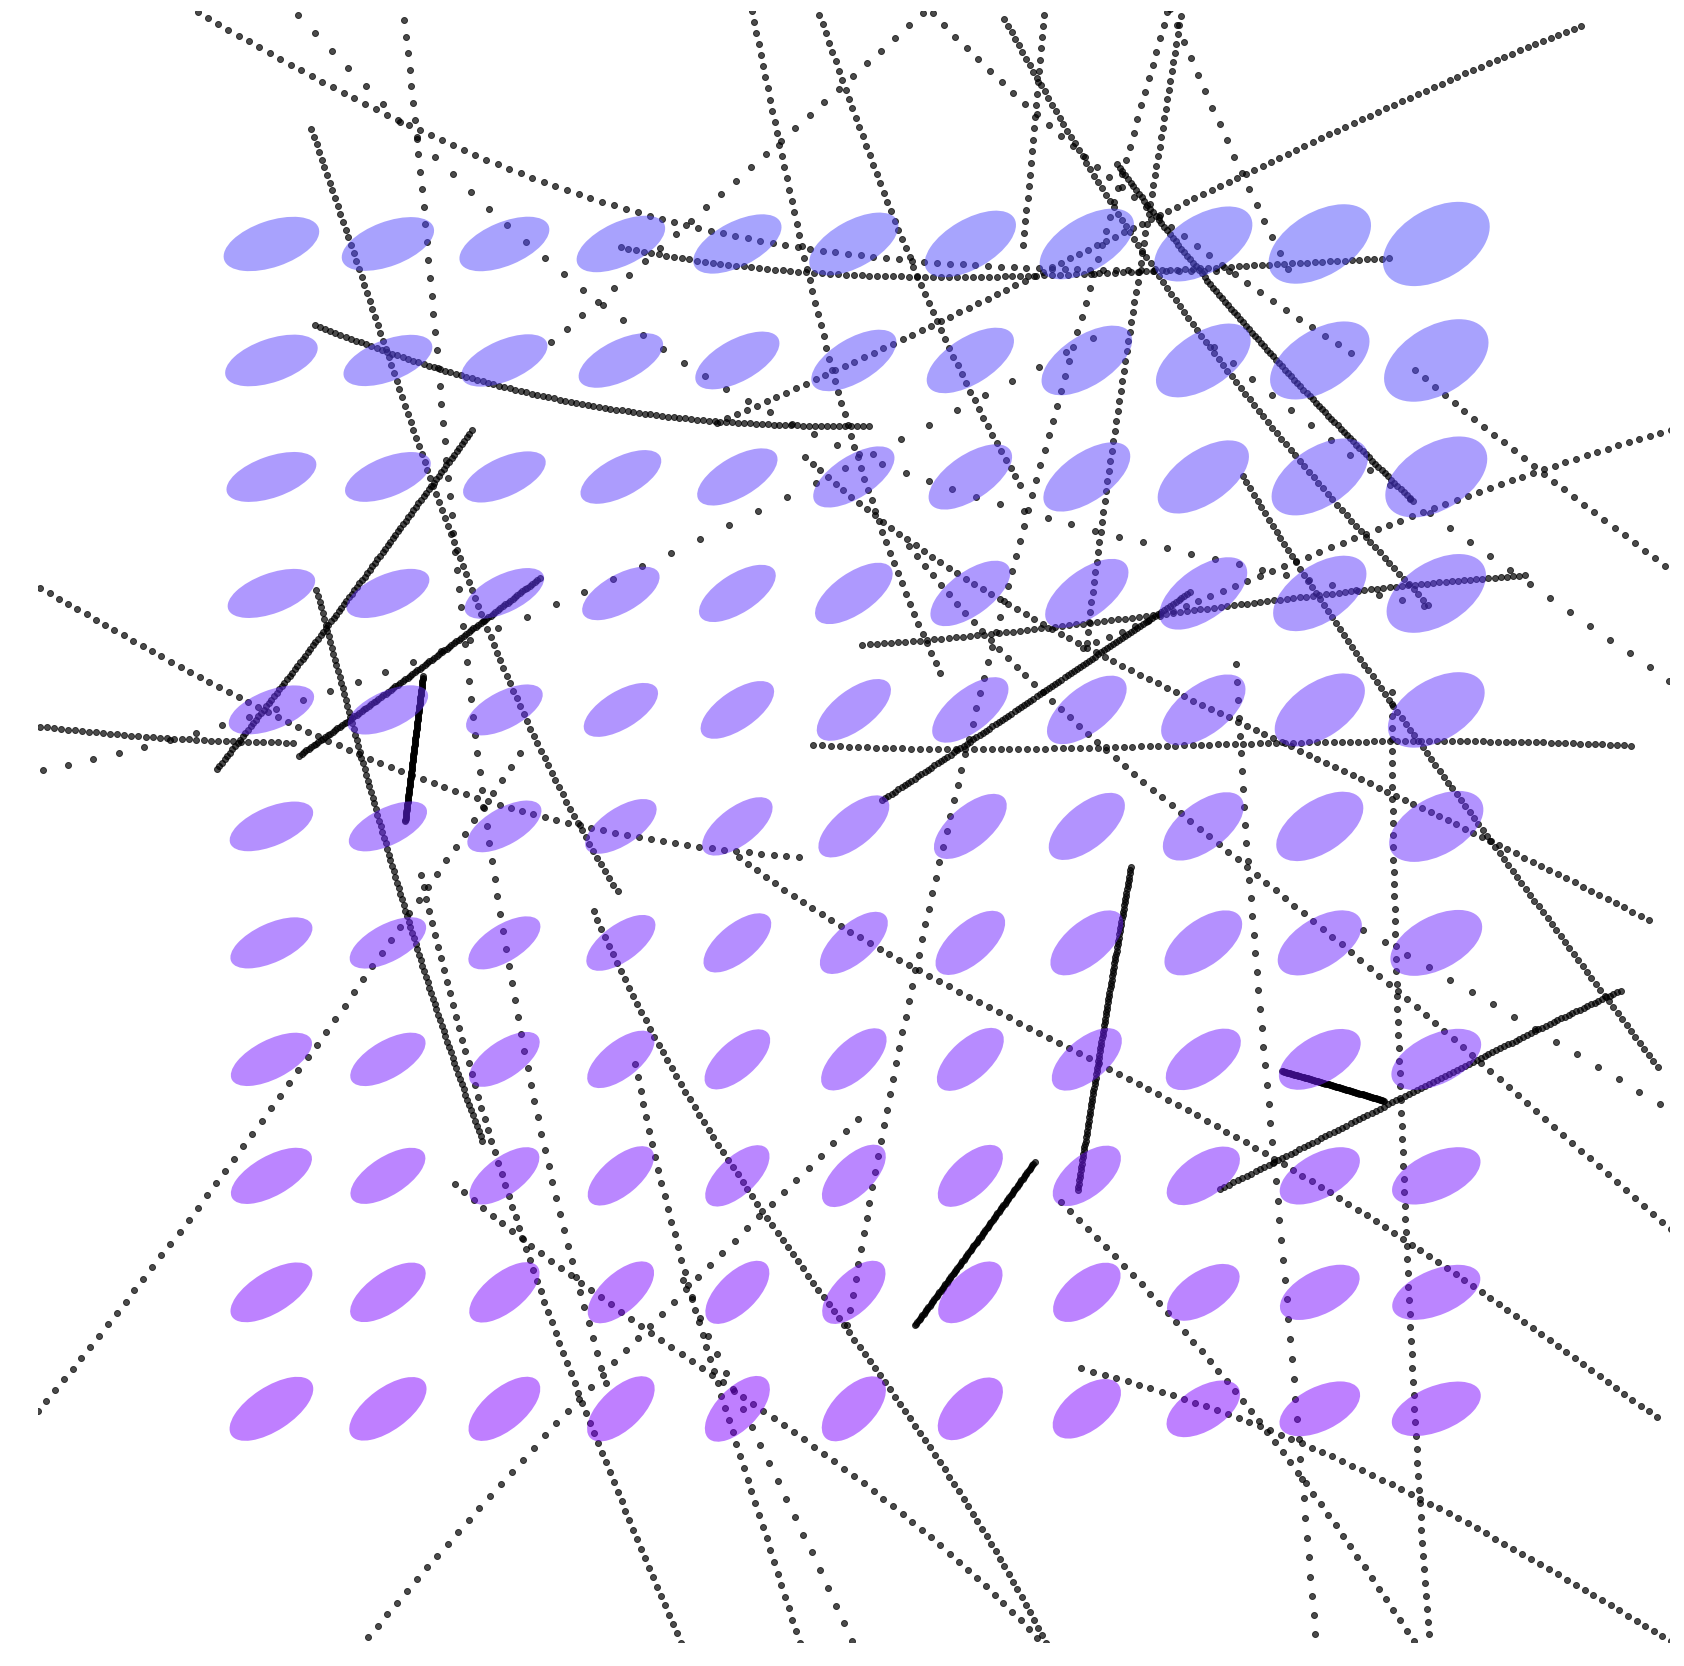

In [4]:
# We do the same thing in dimension 2.
for width in [0.05, 0.1, 0.3, 0.5]:
    box = np.zeros((2, 2))
    box[:, 0] = np.zeros(2)
    box[:, 1] = np.ones(2)
    interpolation_points = torch.from_numpy(create_regular_grid_of_points(box, width)).type(tensor_type)
    interpolation_values = torch.from_numpy(np.random.uniform(0., 1., size=(len(interpolation_points), 3))).type(tensor_type)
    #interpolation_values = interpolation_values / torch.sum(interpolation_values)

    manifold_parameters = {'width': width,
                                   'interpolation_points' : interpolation_points,
                                   'interpolation_values' : interpolation_values
                                    }

    exponential_factory = ExponentialFactory('parametric', 2, manifold_parameters)

    exponential = exponential_factory.create()
    exponential.number_of_time_points = 100

    initial_positions, initial_velocities, final_positions, trajectories = \
            sample_geodesics(50, exponential, tensor_type=tensor_type)

    ax = plot_metric(exponential)

    #plt.figure(figsize=(20, 20))
    plot_trajectories(trajectories, max_plots=10000, ax=ax)
    #ax.set_title('Interpolation width {}'.format(width), fontsize=30)
    plt.savefig(os.path.join('../Figures/', 'sample_parametric_geodesics_dim_2_{}.png'.format(width)), bbox_inches='tight', pad_inches=0.)
    plt.show()


# Preliminary experiments

In [158]:
output_dir = '../output/output_test'
xis = np.loadtxt(os.path.join(output_dir, 'train_xis.txt'))
taus = np.loadtxt(os.path.join(output_dir, 'train_taus.txt'))
sources = np.loadtxt(os.path.join(output_dir, 'train_sources.txt'))

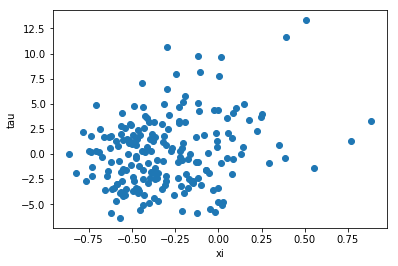

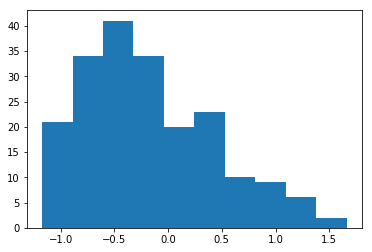

In [159]:
plt.scatter(xis, taus)
plt.xlabel('xi')
plt.ylabel('tau')
plt.show()

try:
    plt.scatter(sources[:, 0], sources[:, 1])
    plt.show()
except IndexError:
    plt.hist(sources[:])
    plt.show()

In [2]:
dico = np.load(os.path.join(output_dir, 'global_params.npy'))[()]


NameError: name 'output_dir' is not defined

In [157]:
# Minimal working example pca to get components and reconstruct

from sklearn.decomposition import PCA

for i in range(11):
    pca = PCA(n_components = i)

    y = np.random.normal(size=(10000, 10))

    x = pca.fit_transform(y)
    matrix = np.transpose(pca.components_)

    print(x.shape, matrix.shape)


    for i in range(i):
        std = np.std(x[:, i])
        x[:, i] = x[:,i] / std
        matrix[:, i] *= std
    
    # Trying to reconstruct
    reconstructed = np.matmul(matrix, x.transpose()).transpose()

    print(reconstructed.shape, y.shape)

    print(np.linalg.norm(reconstructed - y) / np.linalg.norm(y))

(10000, 0) (10, 0)
(10000, 10) (10000, 10)
1.0
(10000, 1) (10, 1)
(10000, 10) (10000, 10)
0.9458557255068989
(10000, 2) (10, 2)
(10000, 10) (10000, 10)
0.8901339177253395
(10000, 3) (10, 3)
(10000, 10) (10000, 10)
0.8292804145479826
(10000, 4) (10, 4)
(10000, 10) (10000, 10)
0.7661100180031097
(10000, 5) (10, 5)
(10000, 10) (10000, 10)
0.69649264583106
(10000, 6) (10, 6)
(10000, 10) (10000, 10)
0.6212627483749138
(10000, 7) (10, 7)
(10000, 10) (10000, 10)
0.537038783785116
(10000, 8) (10, 8)
(10000, 10) (10000, 10)
0.43647526739934267
(10000, 9) (10, 9)
(10000, 10) (10000, 10)
0.30797019952002386
(10000, 10) (10, 10)
(10000, 10) (10000, 10)
0.008991184122622299


[[0.05687166 0.04759481 0.01485819]
 [0.01071528 0.0268077  0.06793363]
 [0.04138478 0.01198857 0.03290007]
 [0.02793884 0.01455635 0.03185794]
 [0.05313289 0.04669242 0.01100619]
 [0.06661201 0.01624374 0.07051976]
 [0.05266346 0.02740731 0.05162639]
 [0.05325542 0.03855907 0.06749245]
 [0.02080931 0.00514258 0.03342917]]
[[0.05687448 0.04759624 0.01485833]
 [0.0107152  0.02674739 0.06796072]
 [0.04139692 0.011981   0.03290431]
 [0.02793584 0.01455468 0.03185995]
 [0.05313932 0.04669721 0.01100856]
 [0.06661361 0.01624805 0.07051927]
 [0.05265752 0.02740807 0.051629  ]
 [0.05325783 0.0385561  0.0674937 ]
 [0.02081238 0.00514364 0.03343069]]
1.005674953001727e-07


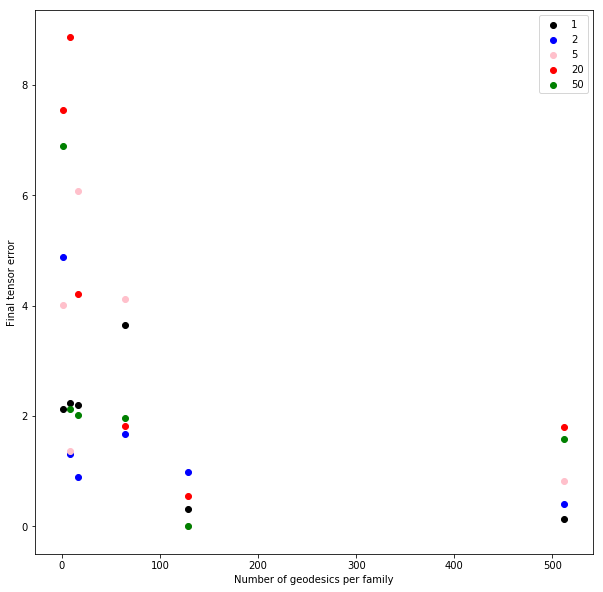

In [42]:
nb_geodesics = [1, 8, 16, 64, 128, 512]
steps_per_geodesics = [1, 2, 5, 20, 50]

numbers = []
steps = []
tensor_errors = []

for nb in nb_geodesics:
    for step in steps_per_geodesics:
        output_dir = '../output/output_geodesics_{}_steps_{}'.format(nb, step)
        numbers.append(nb)
        steps.append(step)
        final_tensor = np.load(os.path.join(output_dir, 'learned_tensor.npy'))
        target_tensor = np.load(os.path.join(output_dir, 'target_tensor.npy'))
        tensor_error = np.sum((final_tensor - target_tensor)**2) / np.sum(target_tensor**2)
        if nb == 128 and step == 50:
            print(target_tensor)
            print(final_tensor)
            print(tensor_error)
        tensor_errors.append(tensor_error)
        
        
# First: we plot the tensor errors for each different number of geodesics

colors = ['red', 'blue', 'green', 'black', 'pink']#, 'purple']
color_list = list(set(colors))
done = []
    
plt.figure(figsize=(10, 10))
for i, color in enumerate(color_list):
    for (nb, step, error) in zip(numbers, steps, tensor_errors):
        if step == steps_per_geodesics[i]:
            if step not in done:
                plt.scatter(nb, error, c=color, label=step)
                done.append(step)
            else:
                plt.scatter(nb, error, c=color)
    
plt.xlabel('Number of geodesics per family')
plt.ylabel('Final tensor error')
plt.legend()
plt.show()

10 [0.8422949572252729, 1.7002154501216415, 0.9324283263873997, 0.5210327159859227, 0.9111935629595059, 0.3842946682690208, 6.360563217664068, 1.252048355062137, 9.921872353963431, 1.784987848991459]
100 [0.2801139518906513, 0.11006330747180634, 0.0579163209045417, 0.4261519977317855, 1.0697044799699214, 0.04799758021112582, 0.12136479979279781, 0.11168811042163951, 0.6323485718659678, 0.0331105588050507]
1000 [0.2689232886201732, 0.12164234356665717, 0.07182986191268903, 0.47087002150240587, 0.04423834255912235, 0.08135111303520084, 0.2820580949493106, 0.12659176866003452, 0.1113893712940655, 0.22041522627894913]
2000 [0.06782866051285559, 0.14542835076949776, 0.3759550721304703, 1.0501767526476917, 0.1152698352247307, 0.16375326787213174, 0.32526593630156325, 0.031076482190095237, 0.11788798383171996, 0.18037636638166182]


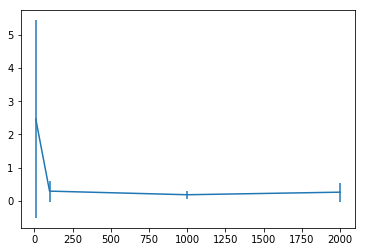

In [58]:
# 
nb_geodesics = [10, 100, 1000, 2000]#, 10000, 20000]

error_means = []
error_stds = []

for nb in nb_geodesics:
    error_for_nb = []
    for fold in range(10):
        output_dir = '../output/output_geodesics_{}_fold_{}'.format(nb, fold)
        final_tensor = np.load(os.path.join(output_dir, 'learned_tensor.npy'))
        target_tensor = np.load(os.path.join(output_dir, 'target_tensor.npy'))
        tensor_error = np.sum((final_tensor - target_tensor)**2) / np.sum(target_tensor**2)
        error_for_nb.append(tensor_error)
    print(nb, error_for_nb)
    error_means.append(np.mean(error_for_nb))
    error_stds.append(np.std(error_for_nb))

plt.errorbar(nb_geodesics, error_means, error_stds)
plt.show()

# Uniform sampling of geodesics

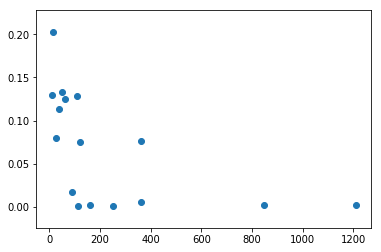

In [90]:
# We gather the results here;
# What we want ? A plot nb_geodesics vs final error

geodesic_sampling_widths = [0.5, 0.3, 0.2, 0.1]
n_points = [9, 16, 36 ,121]
n_directions = [1, 3, 7, 10]

results = []

for i, width in enumerate(geodesic_sampling_widths):
    for n_dir in n_directions:
        output_dir = os.path.join('../output/output_width_{}_n_dir_{}'.format(width, n_dir))
        tensor_losses = np.loadtxt(os.path.join(output_dir, 'tensor_losses.txt'))
        # Number of geodesics computed ?
        n_geodesics = n_points[i] * n_dir
        results.append([n_geodesics, tensor_losses[-1]])
           
results = np.array(results)
plt.scatter(results[:, 0], results[:, 1])
plt.show()
                            

# Single point

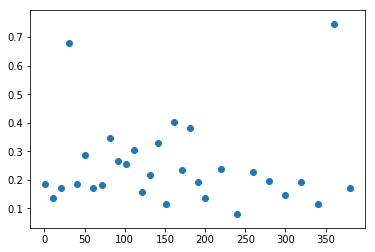

In [91]:
# We gather the results here;
# What we want ? A plot nb_geodesics vs final error

geodesic_sampling_widths = [1.]
n_directions = list(range(1, 200, 10)) + list(range(200, 400, 20))

results = []

for width in geodesic_sampling_widths:
    for n_dir in n_directions:
        output_dir = os.path.join('../output/output_width_{}_n_dir_{}'.format(width, n_dir))
        tensor_losses = np.loadtxt(os.path.join(output_dir, 'tensor_losses.txt'))
        # Number of geodesics computed ?
        n_geodesics = n_dir
        results.append([n_geodesics, tensor_losses[-1]])
           
results = np.array(results)
plt.scatter(results[:, 0], results[:, 1])
plt.show()

# Particular shape of metric

20 trajectories have been computed


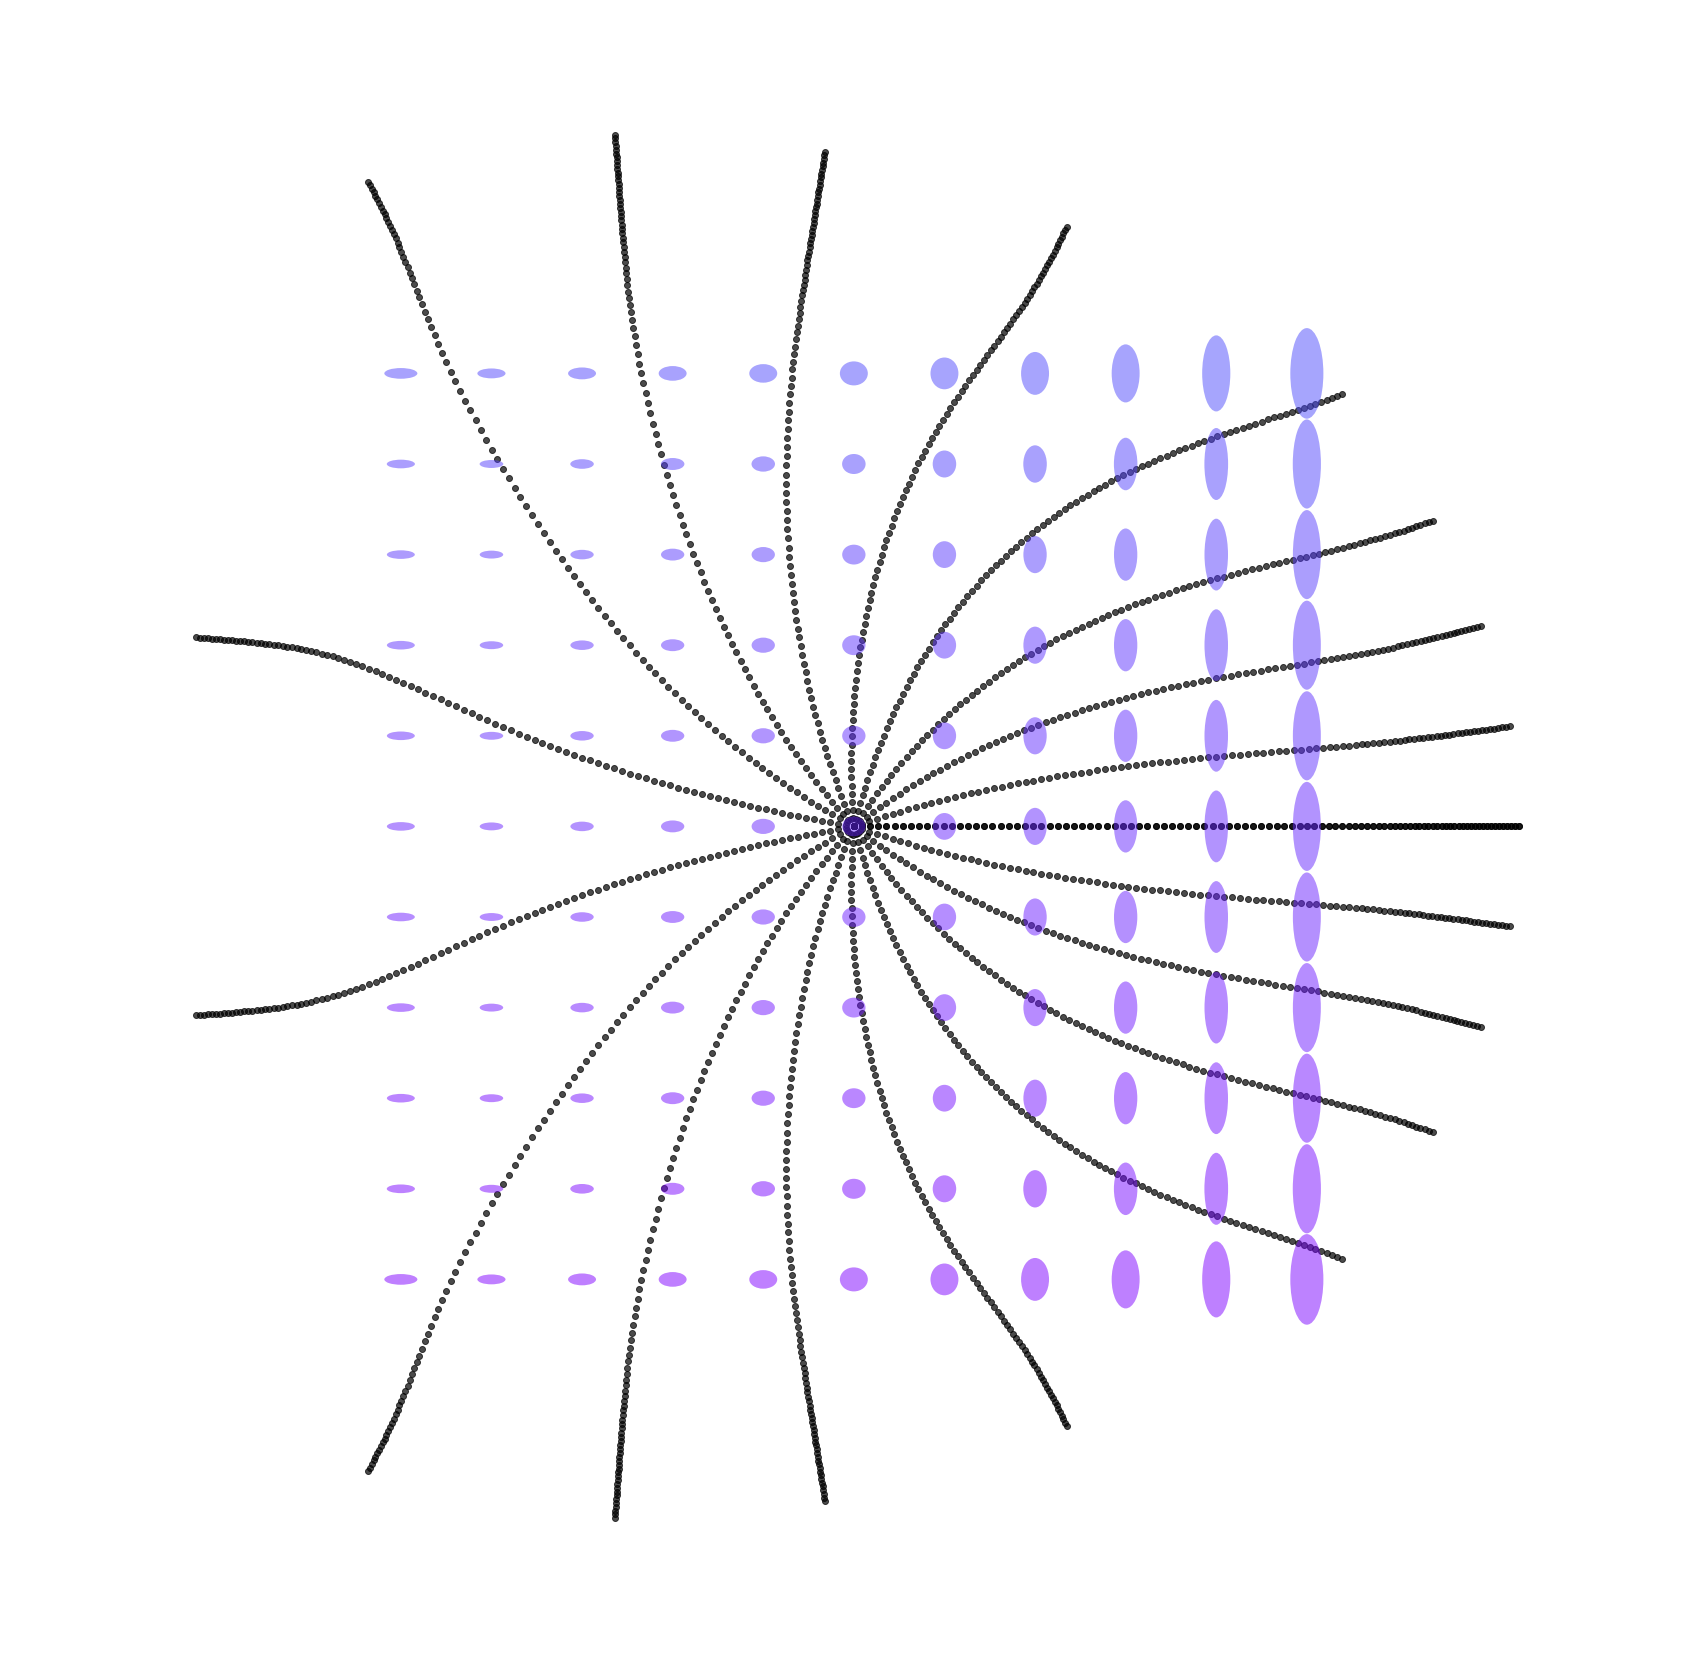

In [13]:
# We do the same thing in dimension 2.
tensor_type = torch.FloatTensor
width = 0.1
box = np.zeros((2, 2))
box[:, 0] = np.zeros(2)
box[:, 1] = np.ones(2)
interpolation_points = torch.from_numpy(create_regular_grid_of_points(box, width)).type(tensor_type)
interpolation_values = np.zeros((len(interpolation_points), 3))

for i, elt in enumerate(interpolation_points):
    x_coord = elt[0]
    val = np.array([1., 0., 2.1 - 2*x_coord])
    interpolation_values[i] = val
    
interpolation_values = torch.from_numpy(interpolation_values).type(tensor_type)
    
manifold_parameters = {'width': width,
                               'interpolation_points' : interpolation_points,
                               'interpolation_values' : interpolation_values
                                }

exponential_factory = ExponentialFactory('parametric', 2, manifold_parameters)

exponential = exponential_factory.create()
exponential.number_of_time_points = 100

#initial_positions, initial_velocities, final_positions, trajectories = \
#        sample_geodesics(50, exponential, tensor_type=tensor_type)

initial_positions, initial_velocities, final_positions, trajectories = \
    sample_geodesics_uniform(0.9, 20, exponential, tensor_type=tensor_type, velocity_norm=3.)

ax = plot_metric(exponential)

#plt.figure(figsize=(20, 20))
plot_trajectories(trajectories, max_plots=10000, ax=ax)
#ax.set_title('Interpolation width {}'.format(width), fontsize=30)
plt.savefig(os.path.join('../Figures/', 'sample_parametric_geodesics_parabolic_dim_2_{}.png'.format(width)), bbox_inches='tight', pad_inches=0.)
plt.show()
